# <center> **Titanic**

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import functions
import importlib

import warnings

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Notebooks\\functions.py'>

# **Display Parameters**

## **Display Features**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

## **Colors**

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## **Figure Parameters**

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data Overview and Preprocessing**

In [17]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\train.csv",
    index_col=False
)

test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\test.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

In [18]:
print('Train Set Shape:', train.shape)
print('Test Set Shape:', test.shape)

Train Set Shape: (8693, 14)
Test Set Shape: (4277, 13)


In [19]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## **Dataset Features**

1. **PassengerId:** A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always..
2. **HomePlanet:** The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep:** Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin:** The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination:** The planet the passenger will be debarking to.
6. **Age:** The age of the passenger.
7. **VIP:** Whether the passenger has paid for special VIP service during the voyage
8. **RoomService:** Amount the passenger has billed for Room Service.
9. **FoodCourt:** Amount the passenger has billed for Food Court.
10. **ShoppingMall:**: Amount the passenger has billed for Shopping Mall.
11. **Spa:**: Amount the passenger has billed for Spa.
12. **VRDeck:**: Amount the passenger has billed for VRDeck.
13. **Name**: The first and last names of the passenger.
13. **Transported**: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# **Descriptive Information**

### **Data Types**

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### **Numerical Features**

In [23]:
train.describe(include="number").map("{:,.2f}".format)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00"


### **Information on Categorical Features**

In [ ]:
train.describe(include="object")

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody
freq,4602,5439,8,5915,8291,2


### **Outliers**

In [ ]:
functions.Outliers(train)

Age               77
RoomService     1861
FoodCourt       1823
ShoppingMall    1829
Spa             1788
VRDeck          1809
dtype: int64


## **Missing Data**

### **Train Set Missing Values**

In [7]:
missing_values = functions.MissingValues(train)
missing_values

,Number_Missing,Percentage_Missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


### **Test Set Missing Values**

In [8]:
missing_values = functions.MissingValues(test)
missing_values

,Number_Missing,Percentage_Missing
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


## **Duplicate Data**

### **Train Set Duplicate Values**

In [9]:
functions.Duplicates(train)


Duplicates: 0, (0.0%)


### **Test Set Duplicate Values**

In [11]:
functions.Duplicates(test)

Duplicates: 0, (0.0%)


# **Exploratory Data Analysis**

Text(0.5, 1.0, 'Target distribution')

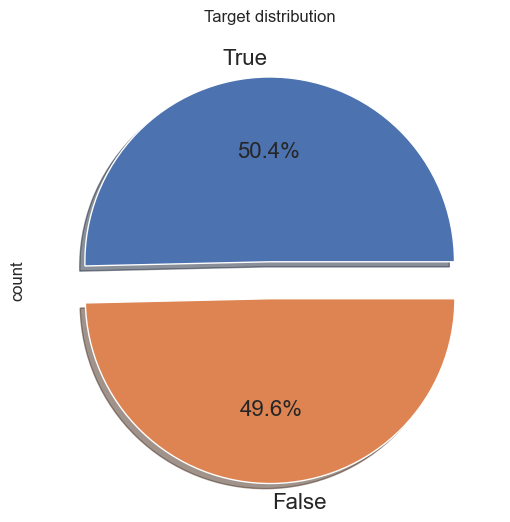

In [58]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")